In [96]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
from operator import attrgetter
import matplotlib.colors as mcolors

In [2]:
#таблица с уникальными идентификаторами пользователей
df_customer = pd.read_csv('olist_customers_dataset.csv')
df_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
#customer_id сколько и order_id, то есть при появлении покупки в базу таблицу записыватся order_id и тут же в customer_id
df_customer.customer_id.nunique()

99441

In [4]:
#совершили хотя бы один заказ с любым статусом столько людей
df_customer.customer_unique_id.nunique()

96096

In [5]:
#разница между ними это сколько людей совершили больше одного заказа с любым статусом (2,3,4...)
df_customer_2=df_customer.customer_id.nunique()-df_customer.customer_unique_id.nunique()
df_customer_2

3345

In [6]:
df_customer.dtypes
#customer_id — позаказный идентификатор пользователя (аналог номера паспорта)
#customer_unique_id —  уникальный идентификатор пользователя
#customer_zip_code_prefix —  почтовый индекс пользователя
#customer_city —  город доставки пользователя
#customer_state —  штат доставки пользователя

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [7]:
#товарные позиции, входящие в заказы
df_order_item = pd.read_csv('olist_order_items_dataset.csv')
df_order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [8]:
df_order_item.dtypes
#order_id —  уникальный идентификатор заказа (номер чека)
#order_item_id —  идентификатор товара внутри одного заказа
#product_id —  ид товара (аналог штрихкода)
#seller_id — ид производителя товара
#shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
#price —  цена за единицу товара
#freight_value —  вес товара

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [9]:
df_order_item['shipping_limit_date'] = pd.to_datetime(df_order_item['shipping_limit_date'])
df_order_item.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [10]:
#таблица заказов
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [11]:
df_orders.dtypes
#order_id —  уникальный идентификатор заказа (номер чека)
#customer_id —  позаказный идентификатор пользователя (аналог номера паспорта)
#order_status —  статус заказа
#order_purchase_timestamp —  время создания заказа
#order_approved_at —  время подтверждения оплаты заказа
#order_delivered_carrier_date —  время передачи заказа в логистическую службу
#order_delivered_customer_date —  время доставки заказа
#order_estimated_delivery_date —  обещанная дата доставки

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [12]:
#таблица заказов
df_orders = pd.read_csv('olist_orders_dataset.csv',parse_dates=[3,4,5,6,7])
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [13]:
#все временные данные имеют тип datetime64[ns]
df_orders.dtypes
#order_id —  уникальный идентификатор заказа (номер чека)
#customer_id —  позаказный идентификатор пользователя (аналог номера паспорта)
#order_status —  статус заказа
#order_purchase_timestamp —  время создания заказа
#order_approved_at —  время подтверждения оплаты заказа
#order_delivered_carrier_date —  время передачи заказа в логистическую службу
#order_delivered_customer_date —  время доставки заказа
#order_estimated_delivery_date —  обещанная дата доставки

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [14]:
#order_id == 00143d0f86d6fbd9f9b38ab440ac16f5
#df_orders.query('order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"')
df_order_item.query('order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [15]:
#сгруппируем по заказу
df_order_item_unique_order = df_order_item.groupby('order_id', as_index=False) \
    .agg({'order_item_id': sum}) \
    .rename(columns={'order_item_id': 'number_item'})

In [16]:
df_orders.order_status.unique()
#created —  создан
#approved —  подтверждён
#invoiced —  выставлен счёт
#processing —  в процессе сборки заказа
#shipped —  отгружен со склада
#delivered —  доставлен пользователю
#unavailable —  недоступен
#canceled —  отменён

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [17]:
df_orders.query('order_status=="delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [18]:
#объединение таблиц
orders_with_customer = pd.merge(df_orders, df_customer, on=['customer_id'])
orders_with_customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [19]:
orders_with_customer.customer_unique_id.nunique()

96096

In [20]:
#объединение таблиц
orders_with_customer_item = pd.merge(orders_with_customer, df_order_item, on=['order_id'])

In [21]:
#created —  создан
#approved —  подтверждён
#invoiced —  выставлен счёт
#processing —  в процессе сборки заказа
#shipped —  отгружен со склада
#delivered —  доставлен пользователю
#unavailable —  недоступен
#canceled —  отменён
orders_with_customer.query('order_status==["delivered","invoiced","processing","shipped"]').customer_unique_id.count()

98200

In [22]:
orders_with_customer_item.customer_unique_id.nunique()

95420

In [23]:
orders_with_customer.query('order_status==["unavailable"]')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27,9004096d8ffc515d4189e661fc4bcb84,3759,sao paulo,SP
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ


In [24]:
orders_with_customer_item.query('order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
41054,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
41055,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
41056,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [25]:
#1. Сколько у нас пользователей, которые совершили покупку только один раз? 95997 совершили только один раз
# Будем считать, что совершение покупки это когда появляется есть запись в "order_approved_at", то есть время подтверждения оплаты
# заказа, так как с этого момента уже будут отказы не всегда со стороны покупателя, а допустем не доступен может быть товар на
#складе
customer_2_3 = orders_with_customer.query('order_approved_at!="NaT"').customer_id.nunique()-\
            orders_with_customer.query('order_approved_at!="NaT"').customer_unique_id.nunique()
customer_1 = orders_with_customer.query('order_approved_at!="NaT"').customer_id.nunique()-customer_2_3 
customer_1

95997

In [26]:
#2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 
# причины не доставки заказа (считаем это когда у нас есть order_approved_at ) это #unavailable —  недоступен
#canceled —  отменён
# со статусом недоступен в среднем в месяц за весь период не доставлено 29
# со статусом отменен в среднем в месяц за весь период не доставлено 23

In [27]:
orders_with_customer=orders_with_customer.assign(month_approved = \
                    orders_with_customer.order_approved_at.dt.to_period('M'))

In [28]:
df_2 = orders_with_customer.query('order_approved_at!="NaT" and order_status == ["unavailable","canceled"]') \
                  .groupby(['month_approved','order_status'], as_index=False) \
                .agg({'order_id': 'count'})\
                .sort_values(['month_approved'], ascending=[True])

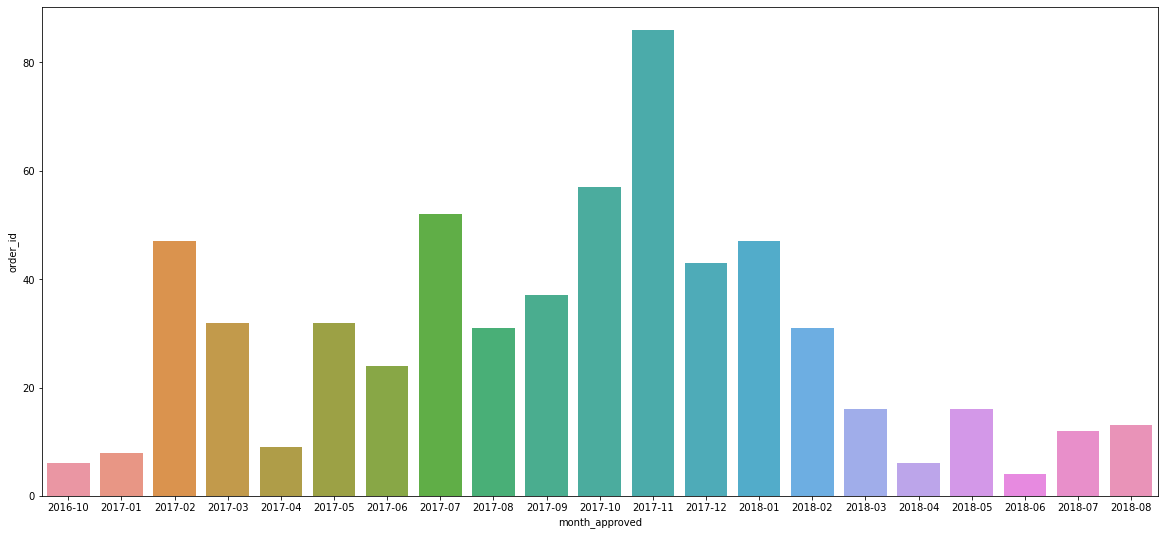

In [29]:
plt.figure(figsize=(20,9))
sns.barplot(x='month_approved', y='order_id', data = df_2.query('order_status=="unavailable"'))

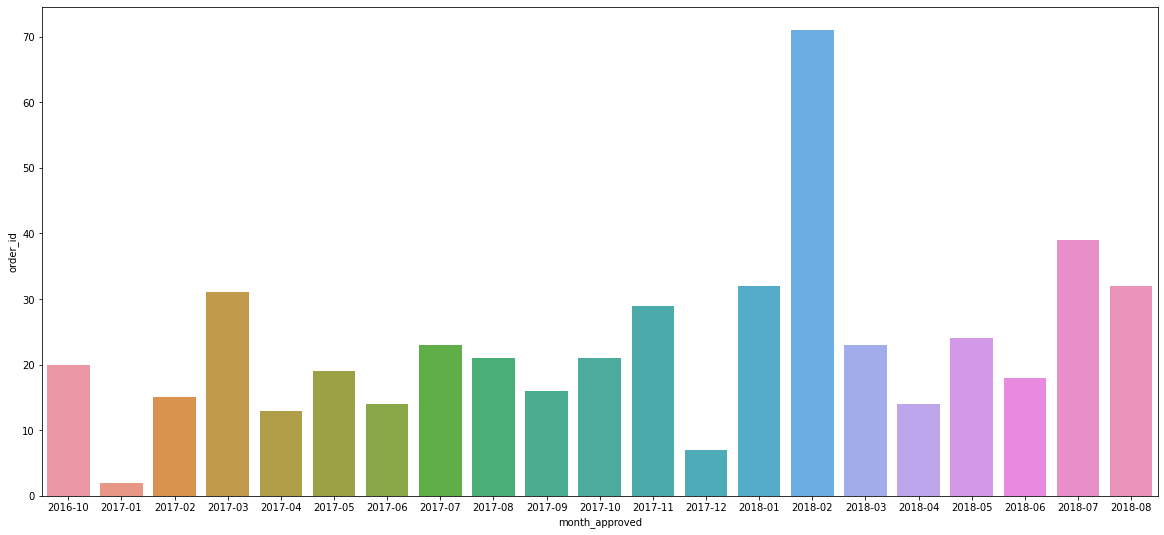

In [30]:
plt.figure(figsize=(20,9))
sns.barplot(x='month_approved', y='order_id', data = df_2.query('order_status=="canceled"'))

In [31]:
round(df_2.query('order_status=="unavailable"').order_id.mean(),2)

29.0

In [32]:
round(df_2.query('order_status=="canceled"').order_id.mean(),2)

23.05

In [33]:
#3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)
#Будем считать, что совершение покупки это когда появляется есть запись в "order_approved_at", то есть время подтверждения оплаты

In [34]:
df_order_item.shape[0]

112650

In [35]:
df_orders.shape[0]

99441

In [36]:
orders_with_items = pd.merge(df_orders, df_order_item, on=['order_id'])
orders_with_items.shape[0]

112650

In [37]:
orders_with_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [38]:
orders_with_items=orders_with_items.assign(day_approved = \
                    orders_with_items.order_approved_at.dt.dayofweek)

In [39]:
orders_with_items.groupby(['day_approved','product_id'], as_index=False) \
                .agg({'order_item_id': 'count'})\
                .sort_values(['day_approved'], ascending=[True])

,day_approved,product_id,order_item_id
0,0.0,001795ec6f1b187d37335e1c4704762e,3
5557,0.0,abc3432ff825d8e524db1d4eac6d2099,5
5556,0.0,abb9d7140478c19fd773dc14e8071abd,1
5555,0.0,abaefce0c17047c6829ff4078f2005d0,1
5554,0.0,abad2a82d0a25653323cec918ba3e54c,1
...,...,...,...
57003,6.0,53f8db8f4a6f6392208198646fd6de63,1
57002,6.0,53ecc2857666872f67f44e60b13d2ed2,2
57001,6.0,53ea9da485f6aed8a6f03a85831fe021,2
56975,6.0,52d6f0dc99f96ca1d2ddbb64146f11b0,1


In [40]:
orders_with_items.groupby(['day_approved'], as_index=False) \
                .agg({'product_id': 'count'})\
                .sort_values(['day_approved'], ascending=[True])

,day_approved,product_id
0,0.0,14667
1,1.0,21782
2,2.0,17865
3,3.0,17706
4,4.0,16719
5,5.0,13839
6,6.0,10057


In [41]:
orders_with_items.groupby(['product_id','day_approved'], as_index=False) \
                .agg({'order_item_id': 'count'})\
                .sort_values(['day_approved'], ascending=[True])\

,product_id,day_approved,order_item_id
50162,d1b1a0e78589ee89279d0be1e4a8b905,0.0,3
30067,7cf14faf0bbe9357dbd24b4a1de69f2d,0.0,1
17782,49cd6408393770922f19ca2925832dcd,0.0,1
10709,2c1a7a693a0c48d9e0327e9b6939bbf8,0.0,1
45947,c0bb0aa12494ff55f377008900ee04b5,0.0,1
...,...,...,...
10422,2ae94d219369eb83f204effd82cb9f31,6.0,1
52264,dad26ceb001cd2ad238e30d744bd9aa2,6.0,1
26600,6ed6fb2418af24e9d020b1c4fd7028fd,6.0,1
10433,2b0233a7e7ded4751e8e3812f9a4553e,6.0,1


In [42]:
orders_with_items.query('product_id=="fffdb2d0ec8d6a61f0a0a0db3f25b441"').day_approved.mode()

0    1.0
dtype: float64

In [43]:
orders_with_items.query('product_id=="000b8f95fcb9e0096488278317764d19"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_approved
30020,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,delivered,2018-08-01 22:00:33,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:52,2018-08-24,1,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.9,19.6,2.0
106745,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,delivered,2018-08-10 13:24:35,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:40,2018-08-27,1,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.9,19.6,4.0


In [44]:
#0-Monday,1-Tuesday, 2-Wendesday, 3-Thursday, 4-Friday, 5-Saturday, 6-Sunday
orders_with_items.groupby(['product_id'], as_index=False).agg({'day_approved':  pd.Series.mode})

,product_id,day_approved
0,00066f42aeeb9f3007548bb9d3f33c38,6
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,4
3,000b8f95fcb9e0096488278317764d19,"[2.0, 4.0]"
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,"[0.0, 5.0]"
32947,fff81cc3158d2725c0655ab9ba0f712c,0
32948,fff9553ac224cec9d15d49f5a263411f,5
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,1


In [45]:
#4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
#Не стоит забывать, что внутри месяца может быть не целое количество недель. 
#Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [46]:
orders_with_customer=orders_with_customer.assign(year_approved = orders_with_customer.order_approved_at.dt.year)
orders_with_customer=orders_with_customer.assign(only_month_approved = orders_with_customer.order_approved_at.dt.month)

In [47]:
#добавим колонку с количество дней в месяце деленную на 7, то есть как раз показатель неделя по месяцам
orders_with_customer=orders_with_customer.assign\
                    (week_month = round(orders_with_customer.order_approved_at.dt.days_in_month/7,2))
orders_with_customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_approved,year_approved,only_month_approved,week_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017.0,10.0,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018.0,7.0,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018.0,8.0,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017.0,11.0,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018.0,2.0,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,2017.0,3.0,4.43
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,2018.0,2.0,4.00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,2017.0,8.0,4.43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2018.0,1.0,4.43


In [48]:
customer_2_3 = orders_with_customer.query('order_approved_at!="NaT"').customer_id.nunique()-\
            orders_with_customer.query('order_approved_at!="NaT"').customer_unique_id.nunique()
customer_2_3

3284

In [49]:
#пользователи у которых есть order_approved_at, то есть в моем исследовани есть покупка
orders_approved = orders_with_customer.dropna(subset=['order_approved_at'])

In [50]:
customer_2_3_1 = orders_approved.customer_id.nunique()-\
            orders_approved.customer_unique_id.nunique()
customer_2_3_1

3284

In [51]:
customer_orders_week=orders_approved.groupby(['customer_unique_id','month_approved','week_month'], as_index= False)\
                .agg({'order_id': 'count'}).sort_values('order_id',  ascending=True)


In [52]:
#в столбце avg_orders показано сколько в среднем совершается покупок в неделю по месяцам для тех, кто совершил покупку,
# у которых есть дата в order_approved_at, то есть время подтвержения покупки
customer_orders_week=customer_orders_week.assign\
                    (avg_orders = round(customer_orders_week.order_id/customer_orders_week.week_month,2))
customer_orders_week

,customer_unique_id,month_approved,week_month,order_id,avg_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1,0.23
65062,a9da5a115fdd7b13412153e54dc02604,2018-04,4.29,1,0.23
65061,a9d935a890e7b3d7a15dc0ed603b1af9,2017-10,4.43,1,0.23
65060,a9d91b01596a92bb257b5b3a5490ef20,2018-01,4.43,1,0.23
65059,a9d8744833cf1b0851a88057fcd56078,2017-05,4.43,1,0.23
...,...,...,...,...,...
76689,c8460e4251689ba205045f3ea17884a1,2018-08,4.43,4,0.90
62114,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4.00,4,1.00
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4.00,4,1.00
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4.29,4,0.93


In [187]:
#5.  Используя pandas, проведи когортный анализ пользователей. 
#В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.
#у нас будут попадть те пользователи, которые совершили заказ и вернулись
#Ответ: с самым высоким retention на 3 месяц у когорт 2018-01 и 2018-03

In [188]:
#https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

In [189]:
#пользователи у которых есть order_approved_at, то есть в моем исследовани есть покупка
orders_with_customer_item = orders_with_customer_item.dropna(subset=['order_approved_at'])

In [190]:
customer_orders_for_all=orders_with_customer_item.groupby(['customer_unique_id'], as_index= False)\
                        .agg({'order_id': pd.Series.nunique}).sort_values('order_id')
customer_orders_for_all

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
63134,a92e1b33fc90178753e232b12bfc1667,1
63133,a92d11f5026db84dd46d221a4e8cb449,1
63132,a92c87122499c9e62ef53013c6b4565b,1
63131,a929fd5ea83b797590cab6496b5b17c2,1
...,...,...
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37531,6469f99c1f9dfae7733b25662e7f1782,7
75550,ca77025e7201e3b30c44b472ff346268,7
23302,3e43e6105506432c953e165fb2acf44c,9


In [191]:
orders_with_customer_item=orders_with_customer_item.assign(month_approved = \
                    orders_with_customer.order_approved_at.dt.to_period('M'))

In [192]:
customer_orders_months=orders_with_customer_item.groupby(['customer_unique_id','month_approved'], as_index= False)\
                        .agg({'order_id': pd.Series.nunique}).sort_values('month_approved')
customer_orders_months

,customer_unique_id,month_approved,order_id
27402,4758bb880479dc35ec48f38bebcdcfc7,2016-09,1
75518,c535e55a7dfd8fc81dbfcafb89695c14,2016-10,1
23159,3c3629948a44757b62d5477fb7b5a265,2016-10,1
25359,41f4ecc59fcdf26b0bedd8e576b49420,2016-10,1
23607,3d6ed7232dcb0837e78ad6ff6123332f,2016-10,1
...,...,...,...
70934,b94401ce46e996c300dbe80fc51298a0,2018-08,1
34154,5914429b9cb0e9fa4066c7080f4537c1,2018-08,1
34161,591936589c89da64f84b37da07fd21e9,2018-08,1
73136,bf0630cdbb318bda61f16449fd235308,2018-08,1


In [193]:
n_orders = orders_with_customer_item.groupby(['customer_unique_id'])['order_id'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / orders_with_customer_item['customer_unique_id'].nunique()
print(f'{100 * mult_orders_perc:.2f}% клиенты купившие больше,чем один раз.')

3.05% клиенты купившие больше,чем один раз.


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, '# of customers'),
 Text(0.5, 0, '# of orders'),
 Text(0.5, 1.0, 'Distribution of number of orders per customer')]

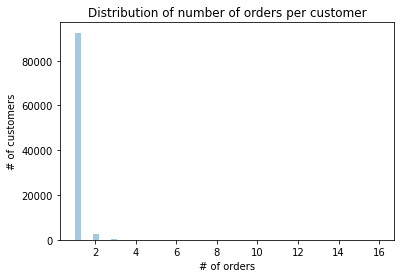

In [194]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers')

In [195]:
#создание когорт
orders_cohort = orders_with_customer_item[['customer_unique_id', 'order_id', 'order_approved_at']].drop_duplicates()
orders_cohort['order_month'] = orders_cohort['order_approved_at'].dt.to_period('M')
orders_cohort

,customer_unique_id,order_id,order_approved_at,order_month
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02
...,...,...,...,...
112644,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03
112645,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,2018-02
112646,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,2017-08
112647,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,2018-01


In [196]:
orders_cohort['cohort'] = orders_cohort.groupby('customer_unique_id')['order_approved_at'] \
                 .transform('min') \
                 .dt.to_period('M') 
orders_cohort

,customer_unique_id,order_id,order_approved_at,order_month,cohort
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10,2017-09
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02,2018-02
...,...,...,...,...,...
112644,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03,2017-03
112645,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,2018-02,2018-02
112646,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,2017-08,2017-08
112647,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,2018-01,2018-01


In [197]:
#attrgetter из разницы между первой покупкой и когортой берет число месяцев
df_cohort = orders_cohort.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))


In [198]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,307.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,718.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1689.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2604.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2314.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN
2017-05,3561.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,10.0,10.0,12.0,7.0,2.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,3124.0,15.0,11.0,12.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,12.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [199]:
#столбец с данными размером когорты, то есть количество пользователей на этот месяц
cohort_size = cohort_pivot.iloc[:,0]
#делим каждый столбец на количество пользователей когорты и узнаем процент, который вернулся через 1,2,3 месяца
retention_matrix_100 = round(cohort_pivot.divide(cohort_size, axis = 0)*100,4)

In [200]:
#для графика без процентов
retention_matrix =round(cohort_pivot.divide(cohort_size, axis = 0),3)

In [201]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,0.003,NaN,0.003,NaN,0.003,NaN,0.003,NaN,0.003,0.007,0.007
2016-12,1.0,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.006,0.003,0.001,0.004,0.001,0.004,0.001,0.001,NaN,0.003,0.003,0.007,0.004,0.001,0.001,0.003,0.004,0.001,NaN
2017-02,1.0,0.002,0.002,0.002,0.004,0.001,0.002,0.002,0.001,0.002,0.001,0.003,0.001,0.002,0.001,0.001,0.001,0.002,NaN,NaN
2017-03,1.0,0.005,0.003,0.003,0.003,0.002,0.002,0.003,0.003,0.001,0.004,0.001,0.002,0.001,0.002,0.002,0.001,0.002,NaN,NaN
2017-04,1.0,0.006,0.002,0.002,0.003,0.003,0.003,0.003,0.003,0.002,0.002,0.001,0.001,0.000,0.001,0.001,0.002,NaN,NaN,NaN
2017-05,1.0,0.005,0.005,0.004,0.003,0.003,0.004,0.001,0.003,0.003,0.003,0.003,0.002,0.001,0.002,0.003,NaN,NaN,NaN,NaN
2017-06,1.0,0.005,0.004,0.004,0.003,0.004,0.004,0.002,0.001,0.002,0.003,0.004,0.002,0.001,0.002,NaN,NaN,NaN,NaN,NaN


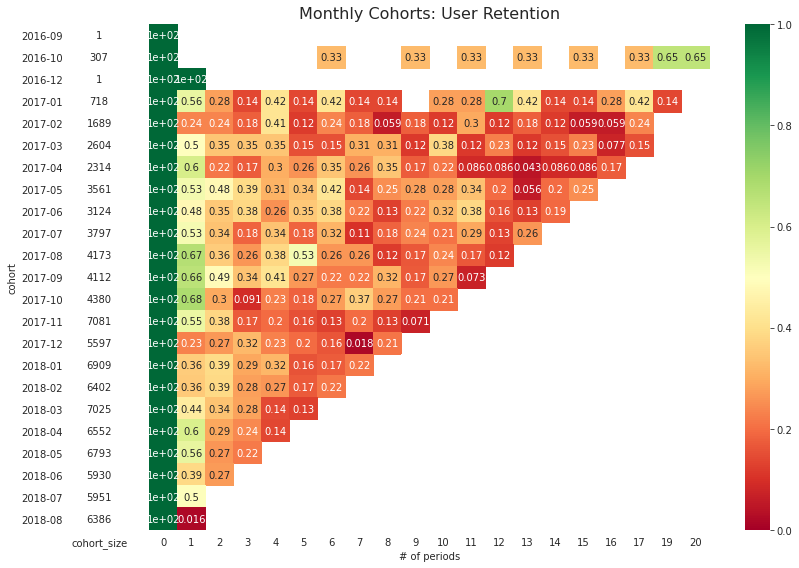

In [202]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 12]})
    
    # retention matrix
    sns.heatmap(retention_matrix_100, 
                mask=retention_matrix_100.isnull(),
                vmin=0,
                vmax=1,
                annot=True,
                #fmt='.0',
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False,
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [203]:
#6. RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
#В кластеризации можешь выбрать следующие метрики: 
#R - время от последней покупки пользователя до текущей даты, 
#F - суммарное количество покупок у пользователя за всё время, 
#M - сумма покупок за всё время. 

#Подробно опиши, как ты создавал кластеры. 
#Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 
#Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) 
#имеет границы метрик recency от 130 до 500 дней, 
#frequency от 2 до 5 заказов в неделю, 
#monetary от 1780 до 3560 рублей в неделю.

In [204]:
orders_with_customer_item.shape

(112635, 19)

In [205]:
#период наших данных составляет 2 года с сентября 2016 года по сентябрь 2018 года
print('Orders from {} to {}'.format(orders_with_customer_item ['order_approved_at'].min(),
                                    orders_with_customer_item ['order_approved_at'].max()))

Orders from 2016-09-15 12:16:38 to 2018-09-03 17:40:06


In [206]:
#R - время от последней покупки пользователя до текущей даты, текущую дату создана как максимальная дата+1 день
# период в год, то есть 365 дней
NOW = orders_with_customer_item['order_approved_at'].max() + timedelta(days=1)
orders_with_customer_item['DaysSinceOrder'] \
        = orders_with_customer_item['order_approved_at'].apply(lambda x: (NOW - x).days)
period = 365

In [207]:
resent= orders_with_customer_item.groupby(['customer_unique_id'], as_index= False)\
                .agg({'DaysSinceOrder': 'min'})
resent

,customer_unique_id,DaysSinceOrder
0,0000366f3b9a7992bf8c76cfdf3221e2,117
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119
2,0000f46a3911fa3c0805444483337064,542
3,0000f6ccb0745a6a4b88665a16c9f078,326
4,0004aac84e0df4da2b147fca70cf8255,293
...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452
95403,fffea47cd6d3cc0a88bd621562a9d061,267
95404,ffff371b4d645b6ecea244b27531430a,574
95405,ffff5962728ec6157033ef9805bacc48,125


In [208]:
#M - сумма покупок за всё время
sale=orders_with_customer_item.groupby(['customer_unique_id'], as_index= False)\
                .agg({'price': 'sum'})
sale

,customer_unique_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
95403,fffea47cd6d3cc0a88bd621562a9d061,64.89
95404,ffff371b4d645b6ecea244b27531430a,89.90
95405,ffff5962728ec6157033ef9805bacc48,115.00


In [209]:
#F - суммарное количество покупок у пользователя за всё время
orders = orders_with_customer_item.groupby(['customer_unique_id'], as_index= False)\
                        .agg({'order_id': pd.Series.nunique}).sort_values('order_id')
orders

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
63134,a92e1b33fc90178753e232b12bfc1667,1
63133,a92d11f5026db84dd46d221a4e8cb449,1
63132,a92c87122499c9e62ef53013c6b4565b,1
63131,a929fd5ea83b797590cab6496b5b17c2,1
...,...,...
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37531,6469f99c1f9dfae7733b25662e7f1782,7
75550,ca77025e7201e3b30c44b472ff346268,7
23302,3e43e6105506432c953e165fb2acf44c,9


In [210]:
RFM_1=pd.merge(orders, sale,on=['customer_unique_id'])
RFM=pd.merge(RFM_1, resent,on=['customer_unique_id'])
RFM

,customer_unique_id,order_id,price,DaysSinceOrder
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,117
1,a92e1b33fc90178753e232b12bfc1667,1,49.80,490
2,a92d11f5026db84dd46d221a4e8cb449,1,24.99,292
3,a92c87122499c9e62ef53013c6b4565b,1,103.00,113
4,a929fd5ea83b797590cab6496b5b17c2,1,106.00,265
...,...,...,...,...
95402,1b6c7548a2a1f9037c1fd3ddfed95f33,7,809.21,201
95403,6469f99c1f9dfae7733b25662e7f1782,7,664.20,68
95404,ca77025e7201e3b30c44b472ff346268,7,806.61,94
95405,3e43e6105506432c953e165fb2acf44c,9,1000.85,188


In [211]:
RFM =RFM.rename(columns = {'order_id': 'Frequency', 
               'price': 'Monetary',
            'DaysSinceOrder': 'Recency'})

In [212]:
RFM

,customer_unique_id,Frequency,Monetary,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,117
1,a92e1b33fc90178753e232b12bfc1667,1,49.80,490
2,a92d11f5026db84dd46d221a4e8cb449,1,24.99,292
3,a92c87122499c9e62ef53013c6b4565b,1,103.00,113
4,a929fd5ea83b797590cab6496b5b17c2,1,106.00,265
...,...,...,...,...
95402,1b6c7548a2a1f9037c1fd3ddfed95f33,7,809.21,201
95403,6469f99c1f9dfae7733b25662e7f1782,7,664.20,68
95404,ca77025e7201e3b30c44b472ff346268,7,806.61,94
95405,3e43e6105506432c953e165fb2acf44c,9,1000.85,188


In [213]:
quintiles = RFM[['Frequency', 'Monetary', 'Recency']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9},
 'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0}}

In [214]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [215]:
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
RFM['M'] = RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [216]:
RFM['RFM Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM

,customer_unique_id,Frequency,Monetary,Recency,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,117,4,1,4,414
1,a92e1b33fc90178753e232b12bfc1667,1,49.80,490,1,1,2,112
2,a92d11f5026db84dd46d221a4e8cb449,1,24.99,292,2,1,1,211
3,a92c87122499c9e62ef53013c6b4565b,1,103.00,113,4,1,3,413
4,a929fd5ea83b797590cab6496b5b17c2,1,106.00,265,3,1,3,313
...,...,...,...,...,...,...,...,...
95402,1b6c7548a2a1f9037c1fd3ddfed95f33,7,809.21,201,3,5,5,355
95403,6469f99c1f9dfae7733b25662e7f1782,7,664.20,68,5,5,5,555
95404,ca77025e7201e3b30c44b472ff346268,7,806.61,94,5,5,5,555
95405,3e43e6105506432c953e165fb2acf44c,9,1000.85,188,3,5,5,355


In [217]:
#10 сегментвов по R, F
#Champions	Bought recently, buy often and spend the most
#Loyal Customers	Buy on a regular basis. Responsive to promotions.
#Potential Loyalist	Recent customers with average frequency.
#Recent Customers	Bought most recently, but not often.
#Promising	Recent shoppers, but haven’t spent much.
#Customers Needing Attention	Above average recency, frequency and monetary values. May not have bought very recently though.
#About To Sleep	Below average recency and frequency. Will lose them if not reactivated.
#At Risk	Purchased often but a long time ago. Need to bring them back!
#Can’t Lose Them	Used to purchase frequently but haven’t returned for a long time.
#Hibernating	Last purchase was long back and low number of orders. May be lost.

In [218]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

RFM['Segment'] = RFM['R'].map(str) + RFM['F'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM.sort_values('Segment')

,customer_unique_id,Frequency,Monetary,Recency,R,F,M,RFM Score,Segment
60348,0f0b543bc0390b3689fa8f1d62e23ade,1,208.00,235,3,1,5,315,about to sleep
67226,1dc45b4cfbce30c703c7875bb8b6af45,1,109.89,238,3,1,3,313,about to sleep
26345,ecf310d40fb1d0a314c2141a7664e3c7,1,32.00,211,3,1,1,311,about to sleep
26346,ecf30cb59f02b641f15ac50c9b1d14a4,1,39.90,227,3,1,1,311,about to sleep
84816,4ec03c6ed0732c3547ecfd5909997d55,1,250.00,227,3,1,5,315,about to sleep
...,...,...,...,...,...,...,...,...,...
53416,3bc8edc7a48812f5f551dd38db0b5466,1,37.49,160,4,1,1,411,promising
53412,3bcc1d1b1fc7bc245aeee1d33b55a7aa,1,39.50,149,4,1,1,411,promising
53406,3bd0646f25efe3b9156b22cde6f3c356,1,629.00,177,4,1,5,415,promising
53384,3c810bde6e641976d6b6676de9edebfa,1,28.62,111,4,1,1,411,promising


In [219]:
name_segments=RFM.Segment.unique()
name_segments[0]

'promising'

In [220]:
#Описание сегментов
for i in name_segments:
    print(i)
    print('Recency from {} to {}'.format(RFM.query('Segment==@i')['Recency'].min(),
                                    RFM.query('Segment==@i')['Recency'].max()))
    print('Frequency from {} to {}'.format(RFM.query('Segment==@i')['Frequency'].min(),
                                    RFM.query('Segment==@i')['Frequency'].max()))
    print('Monetary from {} to {}'.format(RFM.query('Segment==@i')['Monetary'].min(),
                                    RFM.query('Segment==@i')['Monetary'].max()))

promising
Recency from 99 to 182
Frequency from 1 to 1
Monetary from 0.85 to 4099.99
hibernating
Recency from 274 to 719
Frequency from 1 to 1
Monetary from 2.29 to 13440.0
about to sleep
Recency from 183 to 273
Frequency from 1 to 1
Monetary from 2.99 to 3690.0
new customers
Recency from 6 to 98
Frequency from 1 to 1
Monetary from 2.2 to 7160.0
loyal customers
Recency from 99 to 273
Frequency from 2 to 9
Monetary from 11.98 to 2238.42
can't loose
Recency from 274 to 697
Frequency from 2 to 6
Monetary from 20.7 to 7388.0
champions
Recency from 1 to 98
Frequency from 2 to 16
Monetary from 20.0 to 4080.0


In [221]:

print('Recency from {} to {}'.format(RFM.query('Segment=="promising"')['Recency'].min(),
                                    RFM.query('Segment=="promising"')['Recency'].max()))
print('Frequency from {} to {}'.format(RFM.query('Segment=="promising"')['Frequency'].min(),
                                    RFM.query('Segment=="promising"')['Frequency'].max()))
print('Monetary from {} to {}'.format(RFM.query('Segment=="promising"')['Monetary'].min(),
                                    RFM.query('Segment=="promising"')['Monetary'].max()))
RFM.query('Segment=="promising"').Recency.min()

Recency from 99 to 182
Frequency from 1 to 1
Monetary from 0.85 to 4099.99


99

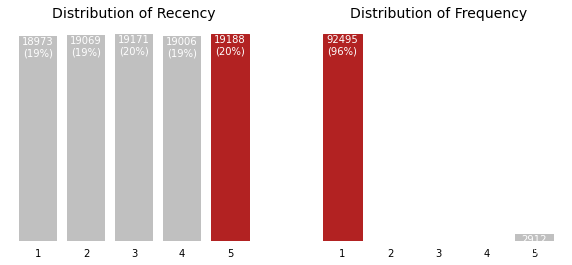

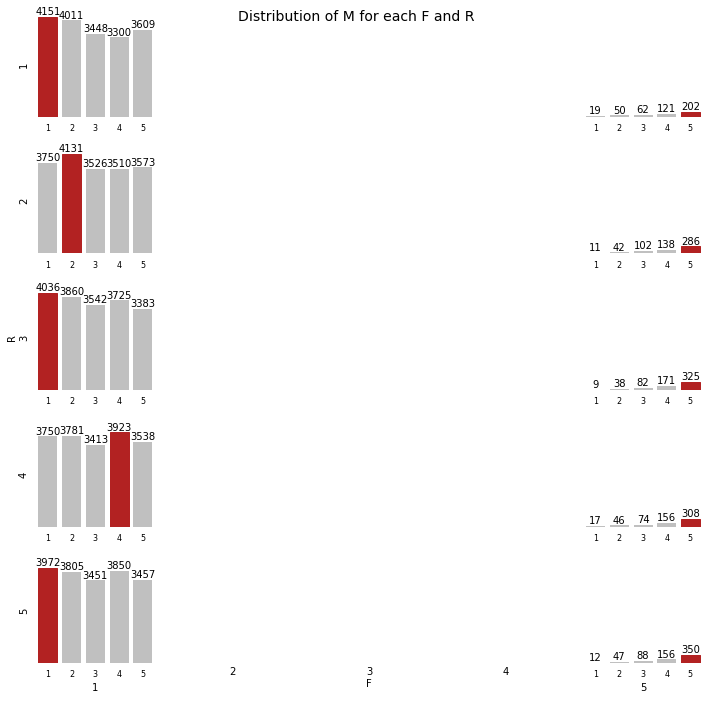

In [222]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = RFM[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = RFM[(RFM['R'] == r) & (RFM['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

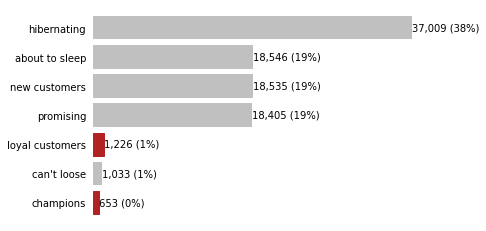

In [223]:
# count the number of customers in each segment
segments_counts = RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()